In [2]:
!pip install xgboost catboost lightgbm scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
data = pd.read_csv(url, header=None, names=columns)

# Encode categorical column
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Target variable: Classify Rings into age categories (less than 10: Young, otherwise: Old)
data['Age'] = (data['Rings'] >= 10).astype(int)
data.drop('Rings', axis=1, inplace=True)

# Features and target
X = data.drop('Age', axis=1)
y = data['Age']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Dataset preprocessing complete.")

Dataset preprocessing complete.


In [4]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7894736842105263


In [5]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(verbose=0)
catboost.fit(X_train, y_train)
y_pred_cat = catboost.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))

CatBoost Accuracy: 0.7978468899521531


In [6]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 1666, number of negative: 1675
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1296
[LightGBM] [Info] Number of data points in the train set: 3341, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498653 -> initscore=-0.005388
[LightGBM] [Info] Start training from score -0.005388
LightGBM Accuracy: 0.7918660287081339


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7954545454545454


In [8]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.7822966507177034


In [9]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.715311004784689


In [10]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Accuracy: 0.7910779681722401


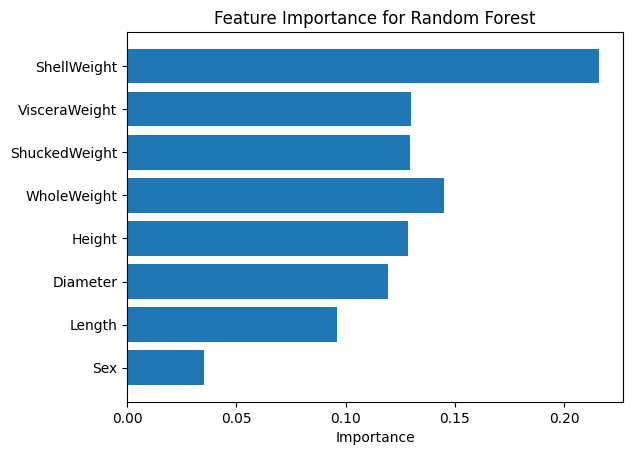

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance for Random Forest
feature_importances = rf.feature_importances_
features = data.drop('Age', axis=1).columns

# Plot feature importance
plt.barh(features, feature_importances)
plt.xlabel("Importance")
plt.title("Feature Importance for Random Forest")
plt.show()

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate all classifiers
classifiers = {
    "XGBoost": y_pred_xgb,
    "CatBoost": y_pred_cat,
    "LightGBM": y_pred_lgb,
    "RandomForest": y_pred_rf,
    "AdaBoost": y_pred_ada,
    "DecisionTree": y_pred_dt
}

for name, predictions in classifiers.items():
    print(f"Classifier: {name}")
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("\n")

Classifier: XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       421
           1       0.79      0.79      0.79       415

    accuracy                           0.79       836
   macro avg       0.79      0.79      0.79       836
weighted avg       0.79      0.79      0.79       836

Confusion Matrix:
[[331  90]
 [ 86 329]]


Classifier: CatBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       421
           1       0.78      0.82      0.80       415

    accuracy                           0.80       836
   macro avg       0.80      0.80      0.80       836
weighted avg       0.80      0.80      0.80       836

Confusion Matrix:
[[326  95]
 [ 74 341]]


Classifier: LightGBM
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       421
           1       0

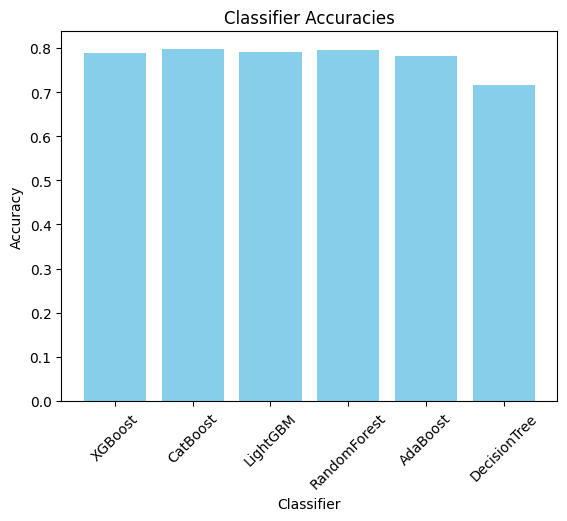

In [13]:
# Compare accuracy scores
accuracies = {
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
    "CatBoost": accuracy_score(y_test, y_pred_cat),
    "LightGBM": accuracy_score(y_test, y_pred_lgb),
    "RandomForest": accuracy_score(y_test, y_pred_rf),
    "AdaBoost": accuracy_score(y_test, y_pred_ada),
    "DecisionTree": accuracy_score(y_test, y_pred_dt)
}

# Plot accuracy comparison
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title("Classifier Accuracies")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()